# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset contains records on medical appointments in Brazil and it records are meant to monitor patients missing medical appointments.

- PatientId: unique value for each and every patient.
- AppointmentID: a unique value for every appointment.
- Gender: indicates the patient's gender (M/F)
- ScheduledDay: Day when appointment was done.
- AppointmentDay: Day of appointment.
- Age: shows the age of the patient.
- Neighborhood: hospital where appointment was done.
- Scholarship: True or False 
- Hipertension: True or False.
- Diabetes: True or False.
- Alcoholism: True or False.
- Handcap: True or False.
- SMS_received: Use to show if a patient received a reminder text message.
- no-show: True (showed up) or False (Never showed up). 


### Question(s) for Analysis
> 
- Do Receiving messages have an effect on comming to the appointment?
- Is there any relationship between showing up and the Age?
- Is there any relationship between showing up and the gender?

In [ ]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### import dataset

In [ ]:
df = pd.read_csv("/content/noshowappointments-kagglev2-may-2016 (2).csv")

# get the first 5 rows of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data information

Get the shape of data, to know the number of row and columns ppresent in the data

In [ ]:
df.shape

(110527, 14)

- We have 110,527 rows, meaning we have 110527 observations.
- The number of columns are 14 representing 14 different variables

Getting datasent info to know the datatypes, column names and the number of observations present

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Try and get all the unique values present in the dataset

In [ ]:
# getting unique value counts
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- The Handcap unique values are 5 while their should be just 2. 
- PatientId, AppointmentID, SheduleDay all have large amounts of unique values which is to be expeced.

Get a summary statistics of the numerical columns in the data

In [ ]:
# Data summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From dataset description, we have ages below 0. 


### Data Cleaning

 

Check if the data contains any duplicate values

In [ ]:
# Check for duplicate
df.duplicated().sum()

0

We have no duplicates in the dataset. 

Check if the data has any missing values

In [ ]:
# Check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in the dataset

Get columns labels so that it can be possible to identify column names which are not standard

In [ ]:
# cleaning column labels
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
# rename the no show column name
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In the summary statistics, it was observed that age had a negative value which is absurd. 

In [ ]:
# Remove absurd values for age
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [ ]:
# display the negative value
df.query("Age < 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
# drop negative age value observation
df.drop(df.query("Age < 0").index,inplace=True)

We can also drop columns that are not required in answering our research questions

In [ ]:
# drop columns that are not used
df.drop(columns=['Hipertension', 'Alcoholism', 'Diabetes', 'Handcap'], axis=1, inplace=True)
df.shape

(110526, 10)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Is there any relationship between showing up and the Age?

We first need to understand the distribution of age, a histogram in this case would come in handy

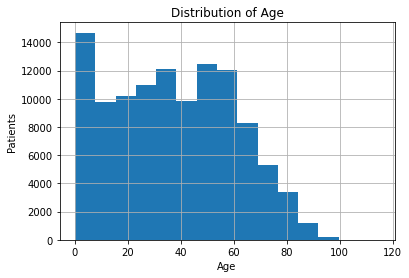

In [ ]:
# Getting age distribution
age_histplot = df.Age.hist(bins=15)
age_histplot.set_xlabel("Age");
age_histplot.set_ylabel("Patients");
age_histplot.set_title('Distribution of Age');

- From the above plot we age is skewed to the left.
- In our analysis we could have used the mean to know the mean age for not showing up and showing up for appointments, but instead we have to use the median

In [ ]:
#  Getting summary statistics
df.groupby("No_show")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
No_show,,,,,,,,
No,88207.0,37.790504,23.338645,0.0,18.0,38.0,56.0,115.0
Yes,22319.0,34.317667,21.965941,0.0,16.0,33.0,51.0,115.0


In [ ]:
# get median age
df.groupby("No_show")["Age"].median()

No_show
No     38.0
Yes    33.0
Name: Age, dtype: float64

### Research Question 2: Is there any relationship between showing up and the gender?

In [ ]:
# Create a function to do countplots
def count_plot(var, xlabel, ylabel, title):
  """
  Create a count bar plot for the given variable column var
  xlabel - the x axis label
  ylabel - y axis label
  title - plot title
  """
  var_barplot = df[var].value_counts().plot(kind="bar")
  var_barplot.set_xlabel(xlabel);
  var_barplot.set_ylabel(ylabel);
  var_barplot.set_title(title);

We can create a countplot to know if the number of males is same to the number of females.

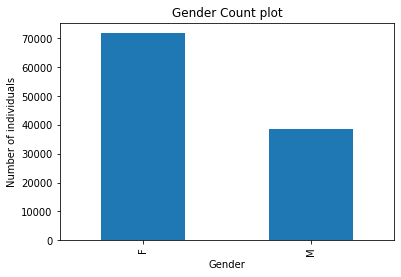

In [ ]:
count_plot("Gender",
           "Gender",
           "Number of individuals",
           "Gender Count plot")

We have alot of Females as compare to males

In [ ]:
# Create a groupby plot function
def groupby(var1, var2, legend, title, xlabel, ylabel):
  """
  function groups data by var1, then gets the values of var2 and returns the count of
  unique values unstacks the values and creates a bar plot of size 10 by 6.
  Legend is a list of the appointment output.
  title is the plot title
  xlabel is the label for the X axis
  ylabel is the label for the y axis
  """
  df.groupby(var1)[var2].value_counts().unstack().plot(kind="bar", figsize=(10,6))
  plt.legend(legend);
  plt.title(title);
  plt.xlabel(xlabel);
  plt.ylabel(ylabel);

We can proceed on and create a count plot for both the genders and get to know how they both are represented in showing up for appointments. 

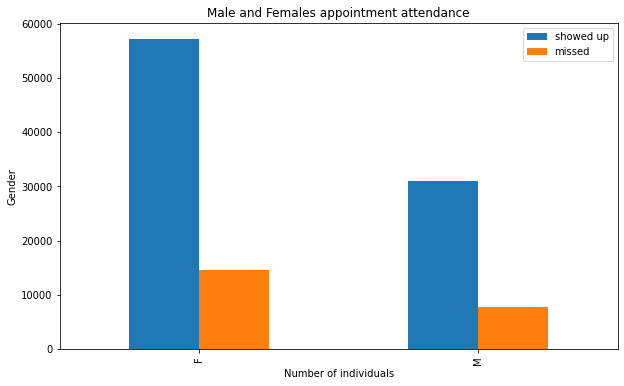

In [ ]:
# plot for appointment show
groupby("Gender", 
        "No_show", 
        ["showed up", "missed"], 
        "Male and Females appointment attendance",
        "Number of individuals",
        "Gender")

### Research Question 3: Do Receiving messages have an effect on comming to the appointment?

First we create a countplot to get to know if those who received messages are the same as to those who never got the messages

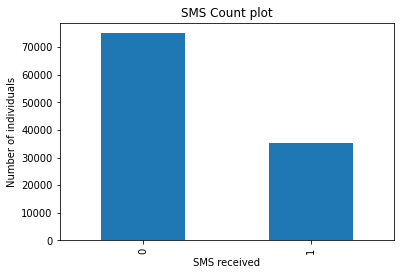

In [ ]:
# SMS recieved countplot
count_plot("SMS_received",
           "SMS received",
           "Number of individuals",
           "SMS Count plot")

Create a count plot showing how the different groups showed up for appointments

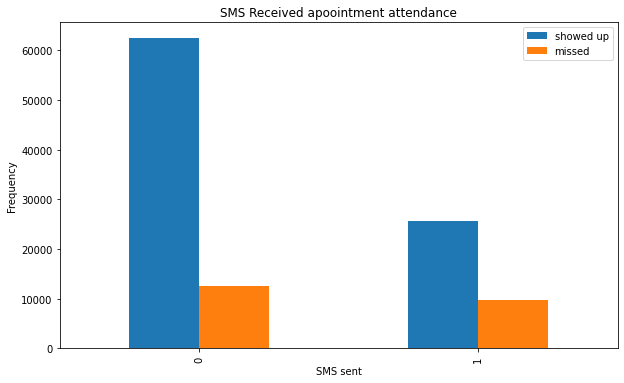

In [ ]:
# plot for appointment show
groupby("SMS_received",
        "No_show",
        ["showed up","missed"],
        "SMS Received apoointment attendance",
        "SMS sent",
        "Frequency")

<a id='conclusions'></a>
## Conclusions

> Research Question 1: Is there any relationship between showing up and the Age?
- The median age for those who show up is around 38 and for those who do not show up is at 33. This means that those with ages above 38 tend to show up for appointments as compared to those whose age is below 33.

> Research Question 2: Is there any relationship between showing up and the gender? 
- from the countplot, we have around 70,000 Females and around 35,000 Males. We have double the number of females compared to males.
- From the male and females attendance plot results, we can see that almost 15,000 females never show up, and around 55,000 showed up.
- For males around 8,000 never showed up and 30,000 showed up 
- From the above results, I can conclude that gender does not have a significant influence on hospital appointments. The number of Females is larger that the number of males also the number of females who show up is also more as compared to make. The bar plot shows similarity in both the males and the females not showing up in terms of numbers. 

> Research Question 3: Do Receiving messages have an effect on comming to the appointment?
- The rusults of the sms countplot show that arount 70000 individuals received a text message and aroung 35000 never received a text message.
- For those who got messages, 60000 went for the appointment while around 10000 did not, On the other hand, for those who never got a message, around 25000 showed up and aound 10000 never showed up.
- From the plot results, Individuals who receive na sms tend to not miss appointments as compared to those who never get an sms. Reason is those who received an sms are many as comapered to those who never received an sms yet the number of those who missed is almost same in both cases. 

> **Limitation**
- In terms of when the sms was sent, we are not sure. Hence cannot make valid conclusions on the results. 
- Statistical tests are not fully utilized in coming up with findings and conclusions. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255